In [1]:
import pandas as pd
import numpy as np
import os
import sys
import Mixture
import multiprocessing
import matplotlib.pyplot as plt

#Library to read RDS format
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

In [2]:
print('Num cores: ' + str(multiprocessing.cpu_count()))

cores = 4
iters = 1000
output = 'outputBetasNoise'

if cores > multiprocessing.cpu_count():
    cores = multiprocessing.cpu_count()

Num cores: 4


In [3]:
# Read xlsx files
X = pd.read_excel('data/LM22Signature.xlsx', sheet_name = 0) 

In [4]:
# Read RDS file
readRDS = robjects.r['readRDS']
df = readRDS('data/betas.noise.list.rds')
with localconverter(robjects.default_converter + pandas2ri.converter):
    df = robjects.conversion.rpy2py(df)
    
subject = df

# Getting expression matrix
vector = [x[2] for x in subject]
columns = ['V' + str(x+1) for x in range(len(subject))]
Y = pd.DataFrame(np.column_stack(vector), columns=columns)
Y.insert(0, 'Gene symbol', df[0][2].rownames)

# Run Mixer Function
if __name__ == '__main__':
    result, pValues = Mixture.Mixture(X, Y , cores, iters, output)

Running mixer with subjects (Count: 1001)...
Normalizing data
Processing...
_____________________________________________________________________
Finish nuSvm
Finish mixer
Get Medias
Creating population (Count: 1000)...
Finish creating population
Finish
Running mixer with porpulationBased (Count: 1001)
Normalizing data
Processing...
_____________________________________________________________________
Finish nuSvm
Finish


In [5]:
# Getting Real Betas Matrix
vector = [x[0] for x in subject]
columns = ['V' + str(x+1) for x in range(len(subject))]
Betas = pd.DataFrame(np.column_stack(vector), columns=columns)

In [119]:
Betas

V1        V2        V3        V4        V5        V6        V7  \
0   0.000000  0.131318  0.000000  0.000000  0.000000  0.129668  0.000000   
1   0.000000  0.201632  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.354279  0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.173234  0.000000   
4   0.537389  0.000000  0.194854  0.237323  0.000000  0.000000  0.169166   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.150854  0.000000   
6   0.000000  0.000000  0.069141  0.000000  0.000000  0.099926  0.000000   
7   0.000000  0.000000  0.204057  0.000000  0.000000  0.186580  0.000000   
8   0.462611  0.278824  0.000000  0.000000  0.000000  0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.090222  0.109464   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.209423   
11  0.000000  0.000000  0.000000  0.000000  0.171527  0.169517  0.233015   
12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
13  0.000000  0.000000  0.226605  0.000000  0.000000  0.000000  0.000000   
14  0.000000  0.111186  0.168891  0.000000  0.000000  0.000000  0.000000   
15  0.000000  0.000000  0.000000  0.377285  0.000000  0.000000  0.000000   
16  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
17  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.082927   
18  0.000000  0.135949  0.136452  0.000000  0.474194  0.000000  0.000000   
19  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20  0.000000  0.000000  0.000000  0.385392  0.000000  0.000000  0.196006   
21  0.000000  0.141092  0.000000  0.000000  0.000000  0.000000  0.000000   

          V8        V9       V10       V11       V12       V13       V14  \
0   0.247196  0.000000  0.000000  0.000000  0.000000  0.000000  0.150057   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.102968  0.000000   
2   0.000000  0.337392  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.370316  0.000000  0.000000  0.101641   
5   0.242024  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000  0.000000  0.276828  0.214646   
7   0.000000  0.000000  0.152084  0.000000  0.000000  0.000000  0.000000   
8   0.000000  0.000000  0.000000  0.000000  0.000000  0.167455  0.000000   
9   0.000000  0.000000  0.115936  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.242238  0.000000  0.000000  0.125278   
11  0.198837  0.000000  0.252316  0.000000  0.111608  0.000000  0.000000   
12  0.000000  0.000000  0.000000  0.000000  0.000000  0.193956  0.000000   
13  0.000000  0.000000  0.000000  0.000000  0.412212  0.138756  0.000000   
14  0.311943  0.000000  0.000000  0.000000  0.351449  0.120037  0.000000   
15  0.000000  0.310345  0.000000  0.000000  0.000000  0.000000  0.000000   
16  0.000000  0.000000  0.000000  0.000000  0.124732  0.000000  0.063540   
17  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
18  0.000000  0.000000  0.223146  0.000000  0.000000  0.000000  0.000000   
19  0.000000  0.352264  0.256518  0.000000  0.000000  0.000000  0.000000   
20  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.113858   
21  0.000000  0.000000  0.000000  0.387446  0.000000  0.000000  0.230980   

         V15       V16       V17       V18       V19       V20       V21  \
0   0.000000  0.000000  0.094801  0.177690  0.000000  0.077765  0.000000   
1   0.252604  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.102358  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.000000  0.094421  0.000000  0.

In [112]:
def blandAltman (betas, result):
    betahat = result.Subjects[0].MIXprop[0].T.to_numpy(copy=True)
    betahat = betahat.flatten()
    
    betasim = betas.to_numpy(copy=True)
    betasim = betasim.flatten()
    
    df = pd.DataFrame(np.transpose([betahat, betasim, (betahat - betasim)]), columns = ['betahat', 'betasim', 'difs'])
    summary = pd.DataFrame([[np.mean(df.difs),np.std(df.difs),np.min(df.difs),np.max(df.difs)]], columns = ['mn', 'sd', 'mi', 'mx'])
    return df, summary
       

In [117]:
ba, summary = blandAltman (Betas, result)

In [120]:
ba

betahat   betasim          difs
0      0.000000  0.000000  0.000000e+00
1      0.128279  0.131318 -3.038679e-03
2      0.000000  0.000000  0.000000e+00
3      0.000000  0.000000  0.000000e+00
4      0.000000  0.000000  0.000000e+00
5      0.127938  0.129668 -1.729264e-03
6      0.000000  0.000000  0.000000e+00
7      0.243195  0.247196 -4.001340e-03
8      0.000000  0.000000  0.000000e+00
9      0.000000  0.000000  0.000000e+00
10     0.000000  0.000000  0.000000e+00
11     0.000000  0.000000  0.000000e+00
12     0.000000  0.000000  0.000000e+00
13     0.150537  0.150057  4.808690e-04
14     0.000000  0.000000  0.000000e+00
15     0.000000  0.000000  0.000000e+00
16     0.090169  0.094801 -4.632275e-03
17     0.164237  0.177690 -1.345374e-02
18     0.000000  0.000000  0.000000e+00
19     0.075023  0.077765 -2.742199e-03
20     0.000000  0.000000  0.000000e+00
21     0.000000  0.000000  0.000000e+00
22     0.092884  0.091782  1.102226e-03
23     0.268356  0.277620 -9.264217e-03
24     0.000000  0.000000  0.000000e+00
25     0.165128  0.166682 -1.554256e-03
26     0.000000  0.000000  0.000000e+00
27     0.000000  0.000000  0.000000e+00
28     0.000000  0.000000  0.000000e+00
29     0.156457  0.139153  1.730369e-02
30     0.000000  0.000000  0.000000e+00
31     0.251490  0.257487 -5.996633e-03
32     0.000000  0.000000  0.000000e+00
33     0.049987  0.053695 -3.708116e-03
34     0.000000  0.000000  0.000000e+00
35     0.243079  0.243292 -2.138681e-04
36     0.161507  0.163038 -1.530137e-03
37     0.000000  0.000000  0.000000e+00
38     0.008817  0.000000  8.816700e-03
39     0.000000  0.000000  0.000000e+00
40     0.000000  0.000000  0.000000e+00
41     0.007222  0.000000  7.222428e-03
42     0.000000  0.000000  0.000000e+00
43     0.000000  0.000000  0.000000e+00
44     0.486578  0.485621  9.571814e-04
45     0.000000  0.000000  0.000000e+00
46     0.000000  0.000000  0.000000e+00
47     0.000000  0.000000  0.000000e+00
48     0.000000  0.000000  0.000000e+00
49     0.000000  0.000000  0.000000e+00
50     0.000000  0.000000  0.000000e+00
51     0.000000  0.000000  0.000000e+00
52     0.125759  0.132402 -6.642764e-03
53     0.000000  0.000000  0.000000e+00
54     0.000000  0.000000  0.000000e+00
55     0.165035  0.172380 -7.344492e-03
56     0.000000  0.000000  0.000000e+00
57     0.074058  0.073872  1.859646e-04
58     0.000000  0.000000  0.000000e+00
59     0.008455  0.000000  8.454854e-03
60     0.444144  0.450159 -6.015062e-03
61     0.164350  0.165233 -8.830936e-04
62     0.000000  0.000000  0.000000e+00
63     0.000000  0.000000  0.000000e+00
64     0.000000  0.000000  0.000000e+00
65     0.000000  0.000000  0.000000e+00
66     0.000000  0.000000  0.000000e+00
67     0.000000  0.000000  0.000000e+00
68     0.118504  0.121201 -2.696233e-03
69     0.349879  0.356461 -6.581702e-03
70     0.000000  0.000000  0.000000e+00
71     0.191162  0.185754  5.408060e-03
72     0.000000  0.000000  0.000000e+00
73     0.000000  0.000000  0.000000e+00
74     0.323535  0.320051  3.484735e-03
75     0.000000  0.000000  0.000000e+00
76     0.495332  0.507829 -1.249687e-02
77     0.000000  0.000000  0.000000e+00
78     0.100627  0.101861 -1.234562e-03
79     0.000000  0.000000  0.000000e+00
80     0.000000  0.000000  0.000000e+00
81     0.000000  0.000000  0.000000e+00
82     0.000000  0.000000  0.000000e+00
83     0.104312  0.107107 -2.794811e-03
84     0.122464  0.120362  2.101857e-03
85     0.557166  0.563282 -6.116682e-03
86     0.000000  0.000000  0.000000e+00
87     0.000000  0.000000  0.000000e+00
88     0.000000  0.000000  0.000000e+00
89     0.159443  0.159452 -8.116315e-06
90     0.147113  0.147857 -7.440029e-04
91     0.088687  0.094282 -5.594726e-03
92     0.000000  0.000000  0.000000e+00
93     0.000000  0.000000  0.000000e+00
94     0.000000  0.000000  0.000000e+00
95     0.274726  0.269234  5.491381e-03
96     0.000000  0.000000  0.000000e+00
97     0.000000  0.000000  0.000000e+00
98     0.000000  0.000000  0.000000e+00
99     0

In [115]:
def blandAltamGraph(ba, summary):
    fig, ax = plt.subplots(figsize=(16,8))
    ax.plot(ba.betasim, ba.difs, 'k.')
    plt.xlabel('Beta Sim')
    plt.ylabel('Difs')
    ax.axhline(summary.mn[0])
    ax.axhline(summary.mn[0]+2*summary.sd[0])
    ax.axhline(summary.mn[0]-2*summary.sd[0])

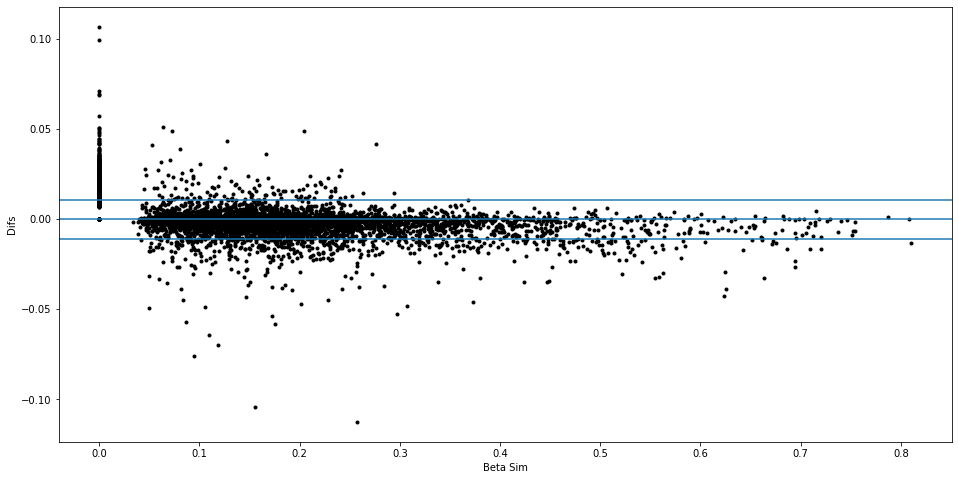

In [118]:
blandAltamGraph(ba, summary)